In [1]:
from numpy import array, linspace, sqrt, sin, cos, pi, zeros, arctan
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def radius (a, e, theta):
    return (a*(1-e**2)) / ( 1 + (e*cos(theta)) )

def acce (r):
    return -GM / (r*r*r)

In [3]:
# Sun parameters
GM = 4*pi**2

# Venus parameters
a_v = 0.72 # AU, semi-major axis
e_v = 0.0068
th_t = 3.39 # Degrees

In [4]:
r_pos = []
th_pos = []

for i in range(360):
    theta = i*(pi/180)
    r_pos.append( radius(a_v, e_v, theta) )
    th_pos.append( theta )

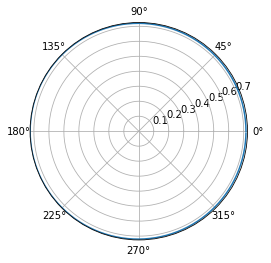

In [5]:
plt.polar(th_pos, r_pos)
plt.show()

In [6]:
n = 200
dt = 2e-2 # yr

x_n = zeros(n, float)
x_n[0] = a_v
y_n = zeros(n, float)

vx_n = zeros(n, float)

vy_n = zeros(n, float)
vy_n[0] = 2*pi

r_n = zeros(n, float)
r_n[0] = a_v

th_n = zeros(n, float)

In [7]:
for i in range(n-1):    
    r_tmp = r_n[i]
    
    vx_tmp = vx_n[i] + x_n[i]*acce(r_tmp)*dt
    vx_n[i+1] = vx_tmp
    
    vy_tmp = vy_n[i] + y_n[i]*acce(r_tmp)*dt
    vy_n[i+1] = vy_tmp
    
    x_n[i+1] = x_n[i] + vx_tmp*dt
    y_n[i+1] = y_n[i] + vy_tmp*dt
      
    th_n[i+1] = th_n[i] + ( sqrt(vx_tmp**2 + vy_tmp**2)/r_tmp ) * dt
    r_n[i+1] = radius(a_v, e_v, th_n[i+1])

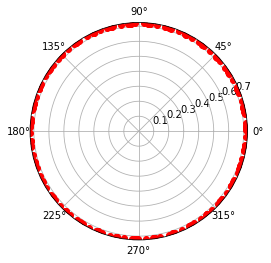

In [8]:
plt.polar(th_n, r_n,'or')
plt.show()

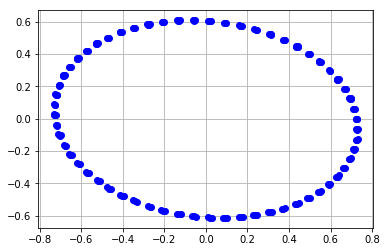

In [9]:
plt.plot(x_n,y_n,'ob')
plt.grid('on')
plt.show()

In [10]:
def dAcce (cond, t, a, e, GM):

    x = cond[0]
    y = cond[1]
    
    ang = arctan(y/x)
    r = (a*(1-e**2)) / ( 1 + (e*cos(ang) ) )
        
    dx = cond[2] # From dx/dt
    dy = cond[3] # From dy/dt 
    
    acc = -GM / (r*r*r)
    
    dvx = x*acc # from dvx/dt
    dvy = y*acc # from dvy/dt
    
    return array([dx, dy, dvx, dvy], float)

In [11]:
n = 200
dt = 2e-2 # yr

t = linspace(0, 4, n) 

x0 = a_v
y0 = 0.

vx0 = 0.
vy0 = 2*pi

#th0 = x0 # Because this is the initial condition for the ODE

initcond = array([x0, y0, vx0, vy0], float)

solu, outodeint = odeint(dAcce, initcond, t, args = (a_v, e_v, GM), full_output=True)

In [12]:
x_pos, y_pos, v_x, v_y = solu.T

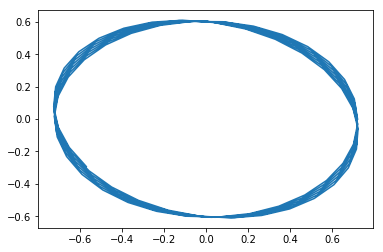

In [13]:
plt.plot(x_pos, y_pos)
plt.show()